# Definition of Files

Import of Classes from `ICONProcessor` and definition of `.nc` Files to be used:
* Definition file of Grid: `<area>_<resolution>m_DOM<nr>.nc`
* Definition of corresponding file containing external parameters (e.g. topo, albedo, land use, etc.): `external_parameter_icon_<area>_<resolution>m_DOM<nr>_<suffix>_tiles.nc`

In [1]:
from ICONProcessor.ICONGrid import ICONGrid

import geopandas as gpd

## Example: HEFEX study area

The following scenarios will be used:
* 411m resolution:
    * plot topography
* 51m resolution:
    * plot albedo
    * plot land use fraction 'ICE'
    * plot dominant land use classes

For the external parameters, the original files have been modified, e.g. the albedo values have been replaced as well as the land use category for *snow & ice* based on the RGI 7.0 outlines.

In [2]:
root_dir = '/Users/geoalxx/Python/_ICON_data/hef/'

file_411_grid      = root_dir + 'grid/hef_411m_DOM04.nc'
file_411_extpar    = root_dir + 'grid/external_parameter_icon_hef_411m_DOM04_ALBEDO_RGI_tiles.nc'

file_51_grid       = root_dir + 'grid/hef_51m_DOM07.nc'
file_51_extpar     = root_dir + 'grid/external_parameter_icon_hef_51m_DOM07_ALBEDO_RGI_tiles.nc'

Read RGI v7.0 outlines for Central Europe as GeoDataframe. The outlines can be used for the plots.

In [3]:
rgi = gpd.read_file('/Users/geoalxx/Python/_shp_collection/RGI7/RGI2000-v7.0-G-11_central_europe/RGI2000-v7.0-G-11_central_europe.shp')
rgi_hef = rgi.loc[rgi['rgi_id'] == 'RGI2000-v7.0-G-11-03116']
display(rgi_hef)

,rgi_id,o1region,o2region,glims_id,anlys_id,subm_id,src_date,cenlon,cenlat,utm_zone,...,zmin_m,zmax_m,zmed_m,zmean_m,slope_deg,aspect_deg,aspect_sec,dem_source,lmax_m,geometry
3115,RGI2000-v7.0-G-11-03116,11,11-01,G010752E46802N,755531,731,2003-07-30T00:00:00,10.751768,46.802314,32,...,2413.2732,3694.625,3042.9658,3013.4644,18.13811,77.065895,3,COPDEM30,8548,"POLYGON Z ((10.75085 46.81381 0, 10.75112 46.8..."


## Plots related to Grid (w/o Simulation Data)

### Plot 1: Show topography for 411m resolution domain (incl. all glacier outlines within selected domain)

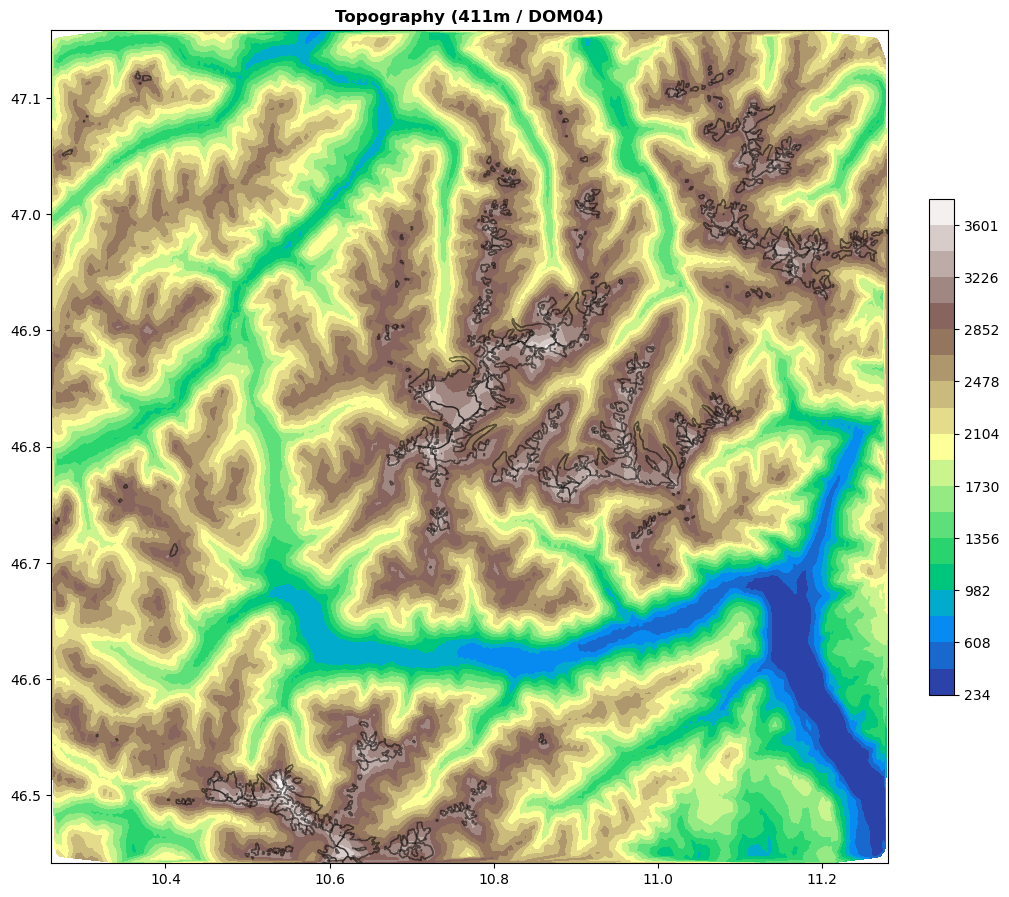

In [4]:
# init grid with files for 411m domain
grid_411 = ICONGrid(file_411_grid, file_411_extpar)

gdf_cells = grid_411.get_triangles()
gdf_cells['topo'] = grid_411.get_topo()

grid_411.plot_single(gdf_cells, 'topo', 'Topography (411m / DOM04)', cmap='terrain', outlines=rgi)

### Plot 2: Show Albedo for August (month=8) for 51m resolution domain (incl. outline of Hintereisferner from RGI)

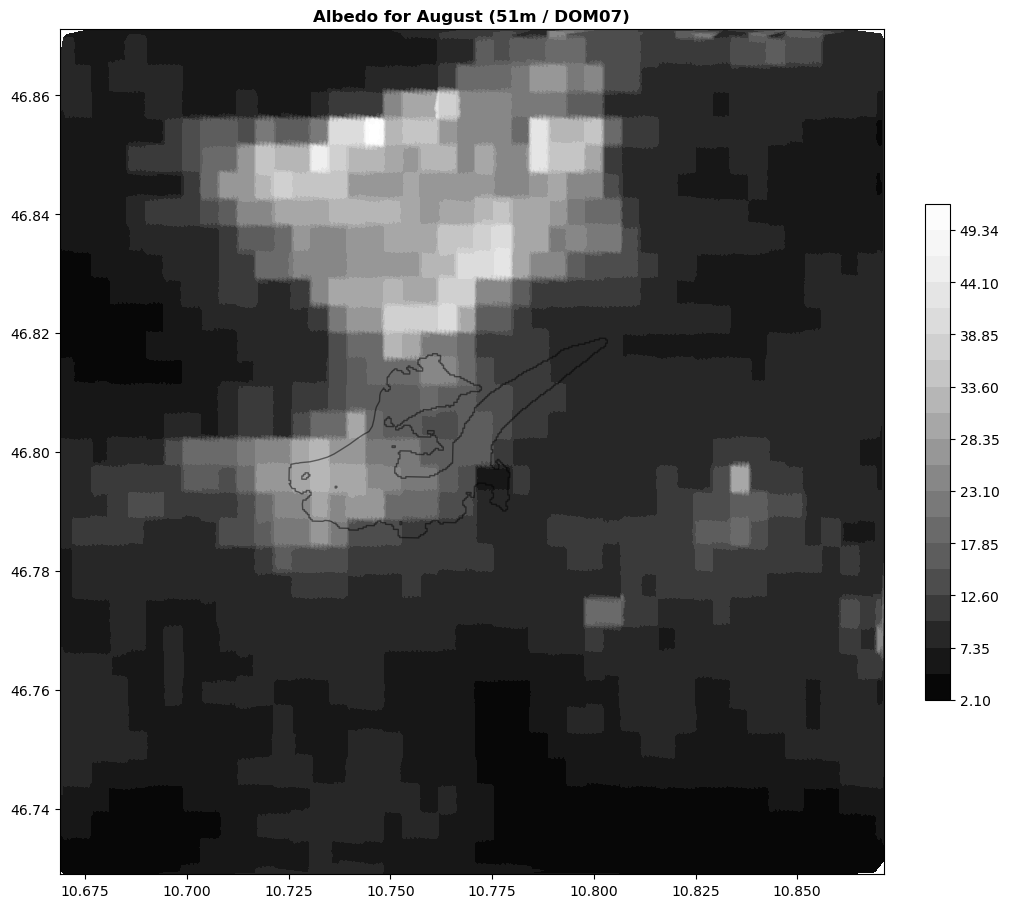

In [5]:
# init grid with files for 51m domain
grid_51 = ICONGrid(file_51_grid, file_51_extpar)

gdf_cells = grid_51.get_triangles()
gdf_cells['albedo'] = grid_51.get_albedo(month=8)
                                        
grid_51.plot_single(gdf_cells,'albedo', 'Albedo for August (51m / DOM07)', cmap='Greys_r', outlines=rgi_hef)

### Plot 3: Show land use fraction of 'ICE' category for 51m resolution domain

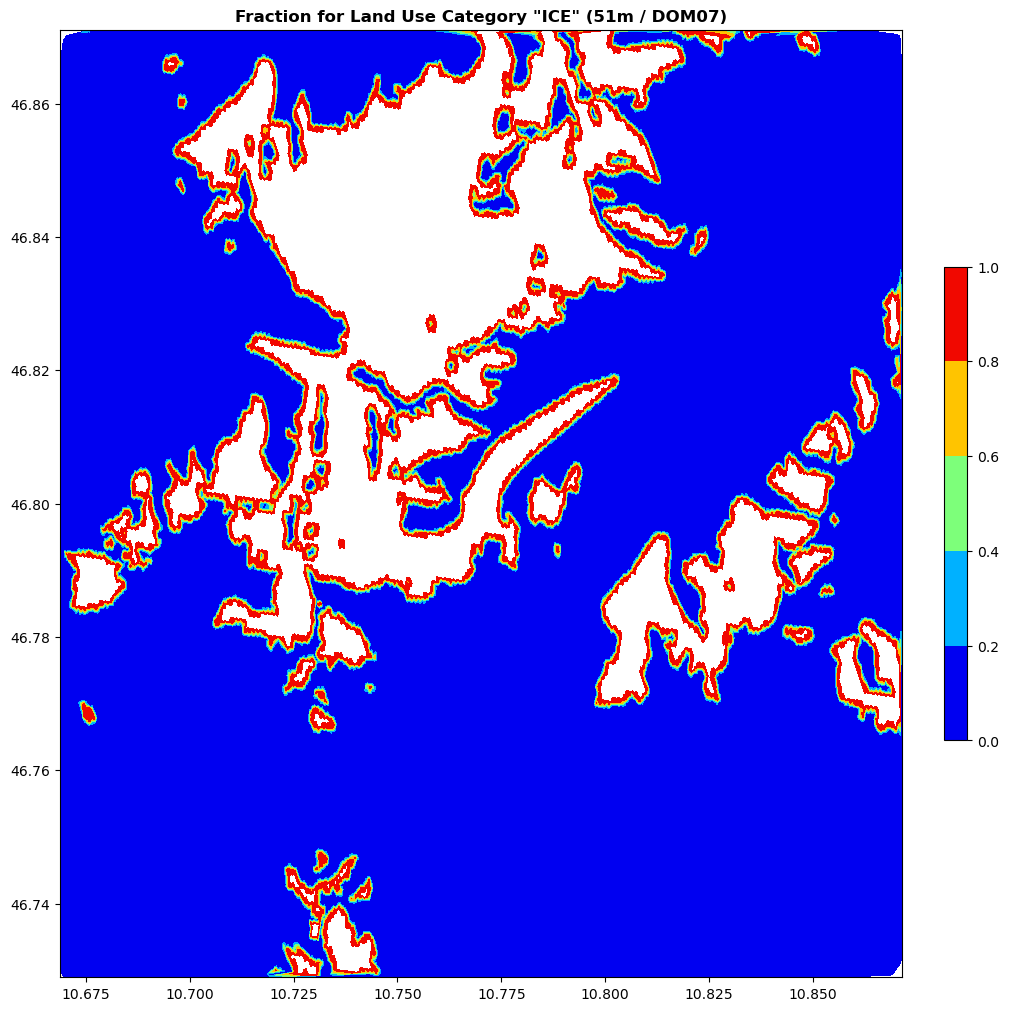

In [6]:
gdf_cells['ice'] = grid_51.get_variable('ICE')
grid_51.plot_single(gdf_cells,'ice','Fraction for Land Use Category "ICE" (51m / DOM07)',cmap='jet',contour_levels=6)

### Plot 4: Show dominant LU classes for 51m resolution domain

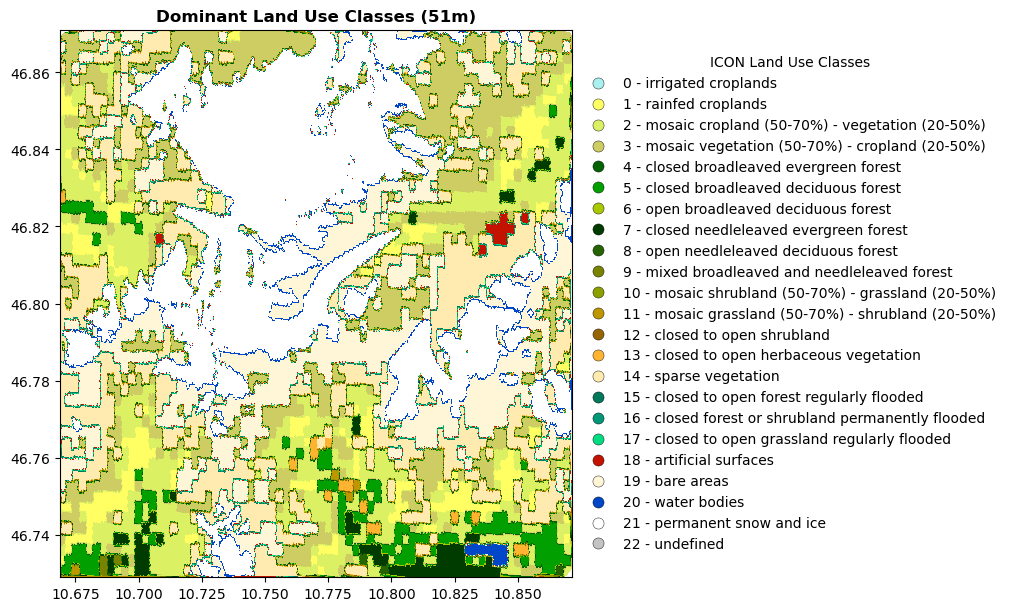

In [7]:
grid_51.plot_dominant_lu_class(title='Dominant Land Use Classes (51m)')